In [39]:
from glob import glob
import torch
from os import listdir
from os.path import splitext
import logging, librosa
from torch.utils.data import Dataset
import numpy as np
import torch
from matplotlib import cm
from librosa import display
import matplotlib.pyplot as plt
from PIL import Image
import scipy.signal as signal
from sklearn import preprocessing
from torch.utils.data import DataLoader, random_split
import torchvision.utils as vutils
import torchvision.transforms as transforms
import os
from itertools import islice

In [5]:
checkpoint="~/checkpoint.pt"

In [13]:
path="/Users/zombie/Downloads/datadrive/ljspeech/wavs/"
revPath="/Users/zombie/Downloads/datadrive/ljspeech/revWavs/"

In [14]:
from dataset import TrainDataset

In [17]:
dset=TrainDataset(path, revPath, samplingRate=16000, segmentLength=16000, nfft=512, winLength=32, window='hamming')

In [20]:
loader=DataLoader(dset, batch_size=16)
i=0
for batch in islice(loader, 2):  
    print('yes {}'.format(i), end="\r")
    i+=1

In [23]:
from unet import UNet
net=UNet(1, 1)
checkpoint=torch.load("/Users/zombie/checkpoint.pt", map_location=torch.device('cpu'))
net.load_state_dict(checkpoint['modelStateDict'])

torch.Size([16, 1, 256, 256])

In [ ]:
out=net(batch[1])

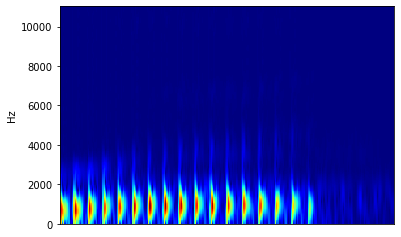

In [82]:
librosa.display.specshow(batch[0][15][0].numpy(), y_axis='hz', cmap=cm.jet)

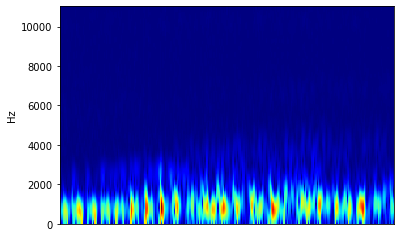

In [75]:
librosa.display.specshow(batch[1][15][0].numpy(), y_axis='hz', cmap=cm.jet)

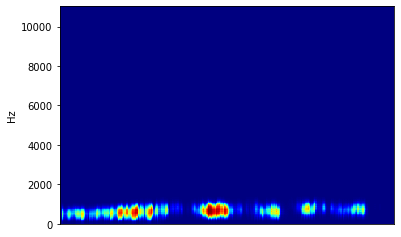

In [83]:
librosa.display.specshow(out[15][0].detach().numpy(), y_axis='hz', cmap=cm.jet)

In [52]:
# plt.figure(figsize=(8,8))
# plt.axis("off")
# plt.title("Training Images")
# plt.imshow(np.transpose(vutils.make_grid(batch[0][2].to("cpu")[:64], padding=2, normalize=True).cpu(),(1,2,0)))

<All keys matched successfully>

In [14]:
# net.eval()

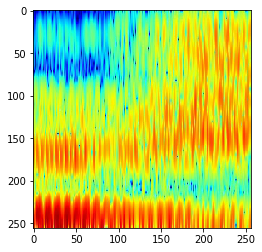

In [28]:
plt.imshow(np.transpose(vutils.make_grid(['reverbed'][0].detach().to("cpu")[:64], padding=2, normalize=True).cpu(),(1,2,0)))

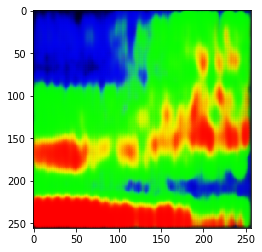

In [29]:
plt.imshow(np.transpose(vutils.make_grid(out[0].detach().to("cpu")[:64], padding=2, normalize=True).cpu(),(1,2,0)))

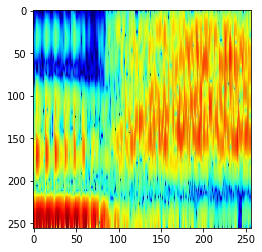

In [30]:
plt.imshow(np.transpose(vutils.make_grid(j['original'][0].detach().to("cpu")[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [40]:
out[0].shape

torch.Size([3, 256, 256])

In [46]:
temp[2].min()

tensor(-1.)

In [48]:
out[2].min()

tensor(-0.9999, grad_fn=<MinBackward1>)

In [ ]:
def Channel3ToAudio

In [52]:
out[0]

tensor([[[-0.9668, -0.9743, -0.9800,  ..., -0.9599, -0.9571, -0.9578],
         [-0.9750, -0.9833, -0.9884,  ..., -0.9584, -0.9559, -0.9554],
         [-0.9807, -0.9887, -0.9926,  ..., -0.9566, -0.9527, -0.9540],
         ...,
         [-0.1425,  0.3996,  0.7885,  ..., -0.6428, -0.7106, -0.8182],
         [-0.5077, -0.0635,  0.4086,  ..., -0.7175, -0.7885, -0.8675],
         [-0.7734, -0.5851, -0.3075,  ..., -0.8205, -0.8665, -0.9049]],

        [[-0.9579, -0.9770, -0.9876,  ..., -0.7952, -0.7905, -0.8084],
         [-0.9781, -0.9908, -0.9962,  ..., -0.7234, -0.7322, -0.7807],
         [-0.9887, -0.9965, -0.9989,  ..., -0.5927, -0.6340, -0.7354],
         ...,
         [-0.9516, -0.9738, -0.9896,  ...,  0.0054, -0.2917, -0.5737],
         [-0.9376, -0.9574, -0.9792,  ..., -0.2757, -0.4921, -0.6800],
         [-0.9066, -0.9268, -0.9504,  ..., -0.5290, -0.6615, -0.7508]],

        [[-0.4353, -0.4822, -0.5439,  ..., -0.2165, -0.2769, -0.3186],
         [-0.4889, -0.5618, -0.6095,  ..., -0